<a href="https://colab.research.google.com/github/jpablocrdn/ARIMA/blob/main/Modelo_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo ARIMA

**Modelo ARIMA para la Producción Eléctrica**

**Introducción**

El objetivo de este estudio es analizar y predecir la producción eléctrica utilizando un modelo ARIMA (Autoregressive Integrated Moving Average). La serie temporal utilizada se basa en datos mensuales de producción eléctrica y fue obtenida desde una fuente en Google Drive.

El modelo ARIMA es adecuado para series temporales estacionarias o que puedan ser transformadas en estacionarias mediante diferenciación. Además, se evaluó el modelo en función de su capacidad para capturar tendencias, estacionalidad y realizar pronósticos a corto y mediano plazo.


###**Base de datos:** [Dataset](https://drive.google.com/file/d/19IL_WdfXDGbOYz_GWXXbXGAMWc46U8NA/view?usp=sharing)

###1. Importar librerías

In [2]:
import pandas as pd  # Manejo de datos en tablas.
import numpy as np  # Cálculos numéricos y generación de datos simulados.
import gdown  # Descargar archivos desde Google Drive.
import matplotlib.pyplot as plt  # Visualización de gráficos.
from statsmodels.tsa.stattools import adfuller  # Prueba de estacionariedad.
from statsmodels.tsa.arima.model import ARIMA  # Implementación de modelos ARIMA.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Gráficos para determinar parámetros AR y MA.
from sklearn.metrics import mean_squared_error  # Evaluación de la calidad del modelo.

###2: Cargar y Visualizar los Datos

Downloading...
From: https://drive.google.com/uc?id=19IL_WdfXDGbOYz_GWXXbXGAMWc46U8NA
To: /content/Electric_Production.csv
100%|██████████| 7.32k/7.32k [00:00<00:00, 15.0MB/s]


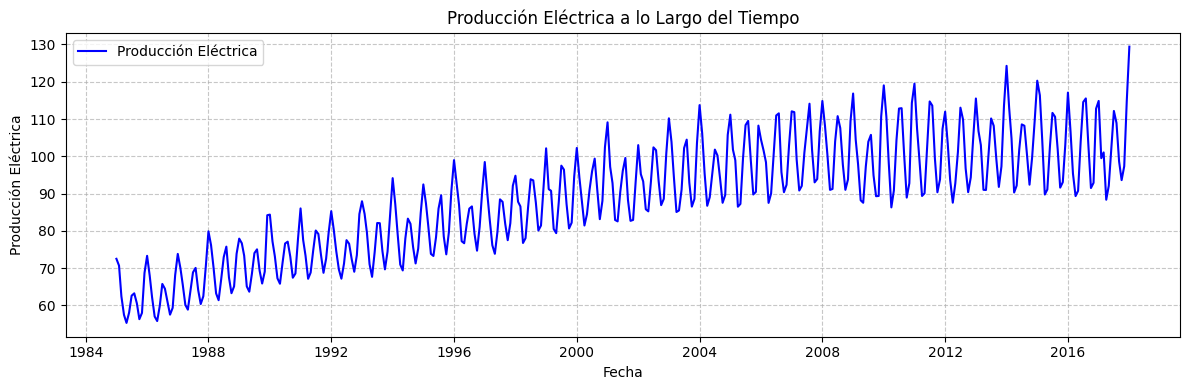

In [3]:
# Descargar y cargar los datos directamente desde Google Drive
gdown.download("https://drive.google.com/uc?id=19IL_WdfXDGbOYz_GWXXbXGAMWc46U8NA", "Electric_Production.csv", quiet=False)
data = pd.read_csv("Electric_Production.csv")

# Convertir 'DATE' a datetime y establecer como índice
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Renombrar la columna para facilitar su interpretación
data.rename(columns={'IPG2211A2N': 'Elec_Prod'}, inplace=True)

# Graficar la serie temporal
plt.figure(figsize=(12, 4))
plt.plot(data.index, data['Elec_Prod'], label='Producción Eléctrica', color='blue')
plt.title('Producción Eléctrica a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción Eléctrica')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

###3: Verificar Estacionariedad
Las series deben ser estacionarias (media y varianza constantes). Utiliza pruebas como Dickey-Fuller o diferenciamiento.

Estadístico ADF: -2.256990350047235
Valor p: 0.1862146911658712
La serie no es estacionaria. Realizamos diferenciamiento.
Estadístico ADF (diferenciada): -7.104890882267311
Valor p (diferenciada): 4.0777865655394095e-10
La serie después del diferenciamiento es estacionaria.


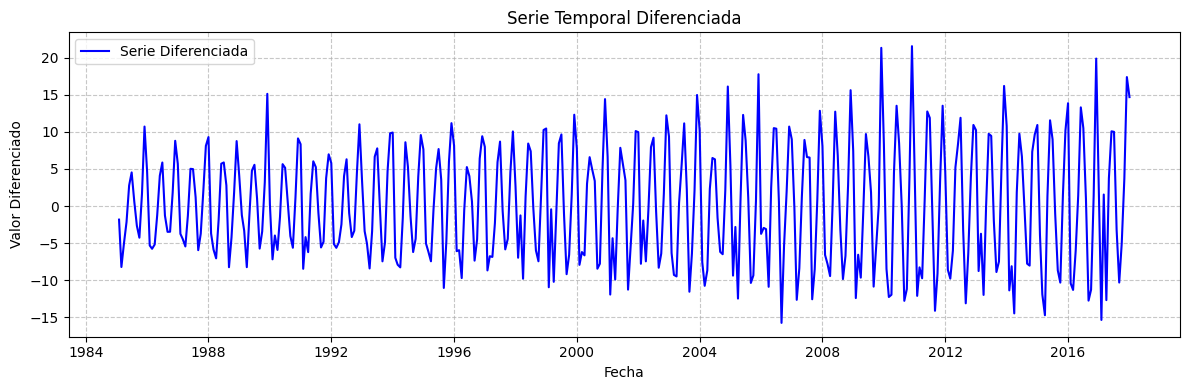

In [12]:
# Realizamos la prueba ADF sobre la columna 'Elec_Prod'
res = adfuller(data['Elec_Prod'])
print("Estadístico ADF:", res[0])
print("Valor p:", res[1])

# Evaluamos la estacionariedad en función del p-valor
if res[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria. Realizamos diferenciamiento.")
    # Aplicamos diferenciamiento para hacer estacionaria la serie
    series_diff = data['Elec_Prod'].diff().dropna()

    # Realizamos la prueba ADF sobre la serie diferenciada
    res_diff = adfuller(series_diff)
    print("Estadístico ADF (diferenciada):", res_diff[0])
    print("Valor p (diferenciada):", res_diff[1])

    if res_diff[1] < 0.05:
        print("La serie después del diferenciamiento es estacionaria.")
    else:
        print("La serie después del diferenciamiento no es estacionaria.")

    # Visualizamos la serie diferenciada
    plt.figure(figsize=(12, 4))
    plt.plot(series_diff, label="Serie Diferenciada", color='blue')
    plt.title("Serie Temporal Diferenciada")
    plt.xlabel("Fecha")
    plt.ylabel("Valor Diferenciado")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###4: Identificar Parámetros ARIMA (p, d, q)
- p: Determina el orden AR utilizando el gráfico de autocorrelación parcial (PACF).
- q: Determina el orden MA utilizando el gráfico de autocorrelación (ACF).

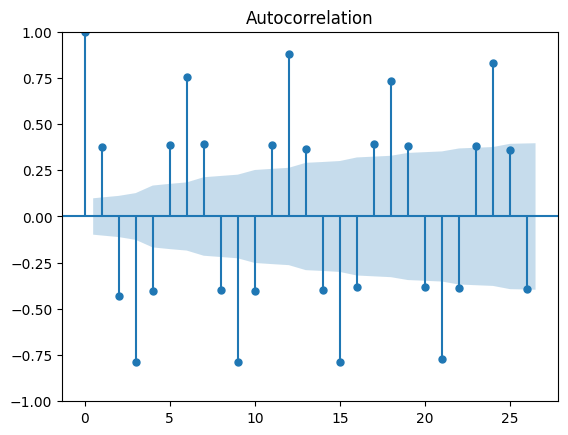

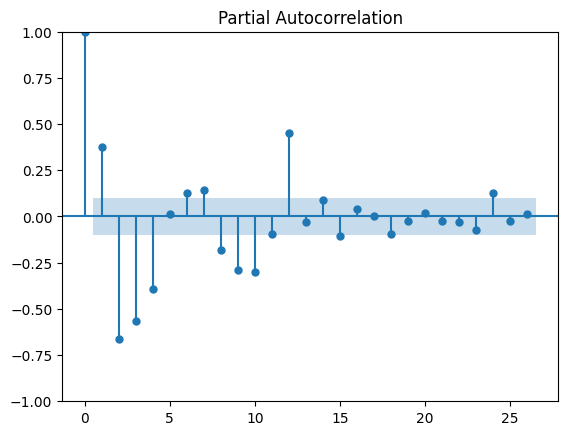

In [14]:
plot_acf(series_diff)
plot_pacf(series_diff)
plt.show()

In [18]:
#!pip install pmdarima
#Identificar el mejor modelo
from pmdarima import auto_arima

modelo = auto_arima(data['Elec_Prod'], seasonal=False, trace=True, stepwise=True)
print(modelo.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2349.722, Time=1.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=2064.370, Time=1.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2058.739, Time=3.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2074.111, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=2060.192, Time=1.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2071.226, Time=0.94 sec

Best model:  ARIMA(2,1,4)(0,0,0)[0] intercept
Total fit time: 18.332 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Sun, 19 Jan 2025   AIC                           2058.739
Time:                        04:34:26   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1107      0.024      4.709      0.000       0.065

###5: Ajustar el modelo ARIMA

In [19]:
# Define los valores de p, d, y q encontrados
p, d, q = 2, 1, 4

# Ajustar el modelo ARIMA
model = ARIMA(data['Elec_Prod'], order=(p, d, q))
result = model.fit()

# Resumen del modelo
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Elec_Prod   No. Observations:                  397
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1028.613
Date:                Sun, 19 Jan 2025   AIC                           2071.226
Time:                        04:35:24   BIC                           2099.096
Sample:                    01-01-1985   HQIC                          2082.267
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.002    521.768      0.000       0.995       1.002
ar.L2         -0.9994      0.001   -857.337      0.000      -1.002      -0.997
ma.L1         -1.3147      0.041    -32.319      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


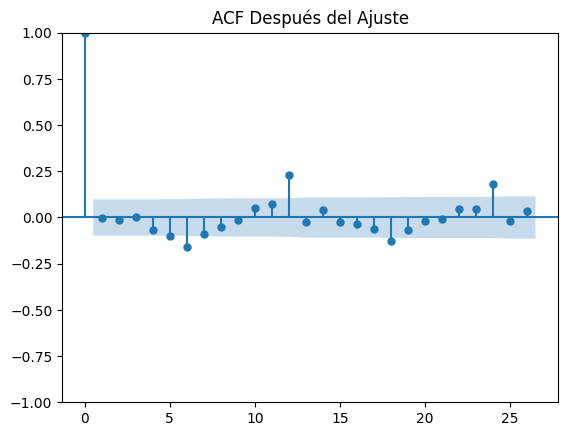

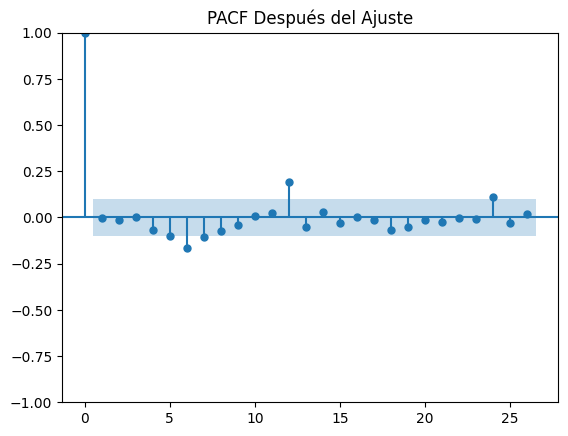

In [20]:
# Obtener los residuos del modelo ajustado
residuals = result.resid

# Graficar ACF y PACF de los residuos
plot_acf(residuals)
plt.title("ACF Después del Ajuste")
plt.show()

plot_pacf(residuals)
plt.title("PACF Después del Ajuste")
plt.show()

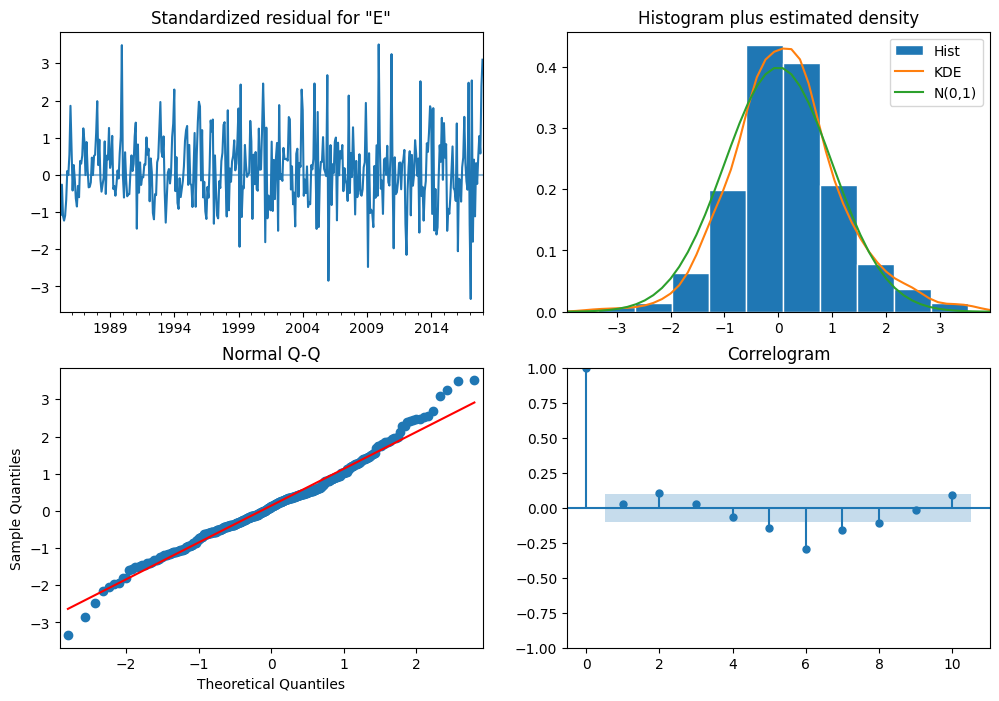

In [ ]:
# Graficar diagnóstico del modelo
result.plot_diagnostics(figsize=(12, 8))
plt.show()

###6: Evaluar el modelo

Error cuadrático medio es: 22.49


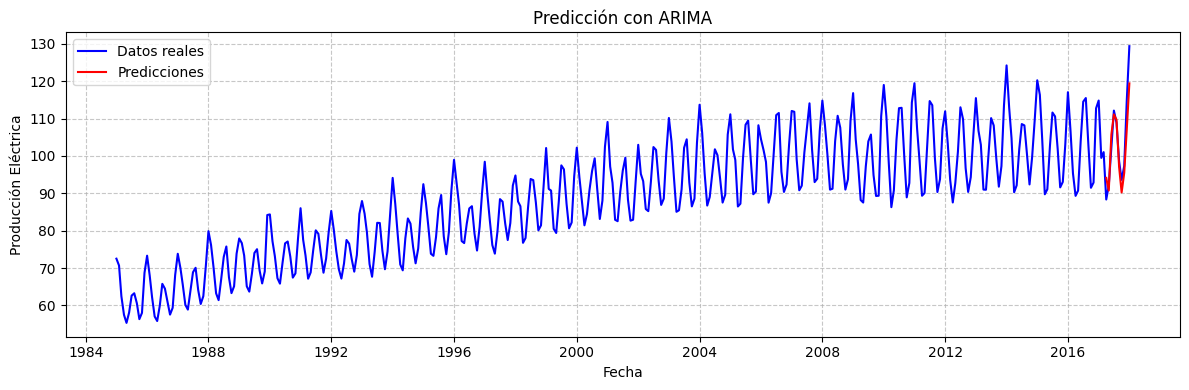

In [24]:
# Realizar predicciones en los últimos 10 valores
predictions = result.predict(start=len(data)-10, end=len(data)-1, dynamic=False)
true_values = data['Elec_Prod'][-10:]

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(true_values, predictions)
print(f"Error cuadrático medio es: {mse:.2f}")

# Visualizar los datos reales y las predicciones
plt.figure(figsize=(12, 4))
plt.plot(data['Elec_Prod'], label="Datos reales", color='blue')
plt.plot(predictions.index, predictions, label="Predicciones", color="red")
plt.title("Predicción con ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción Eléctrica")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

###7: Predicción de los próximos 12 pasos

<ipython-input-26-e94a62d2da8b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]


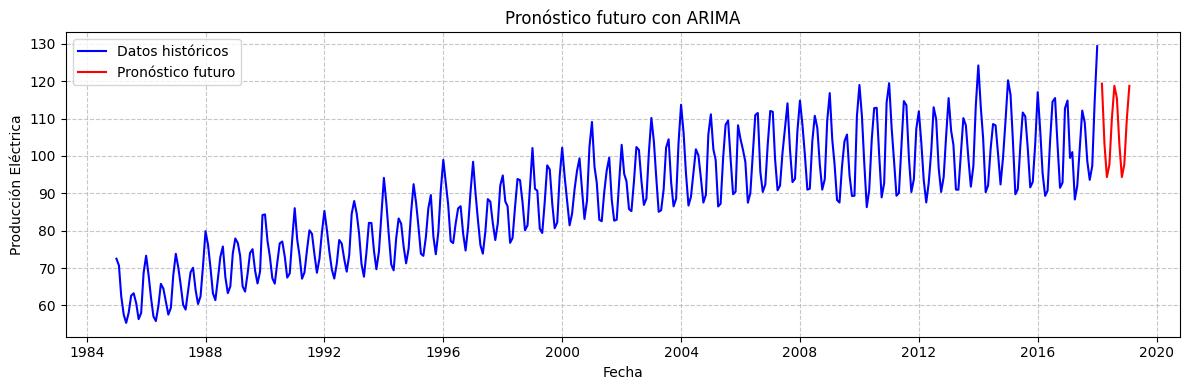

In [26]:
# Realizar predicciones futuras
forecast_steps = 12  # Número de pasos a predecir
forecast = result.forecast(steps=forecast_steps)

# Generar fechas para las predicciones
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Visualizar los datos históricos y las predicciones
plt.figure(figsize=(12, 4))
plt.plot(data.index, data['Elec_Prod'], label='Datos históricos', color='blue')
plt.plot(forecast_index, forecast, label='Pronóstico futuro', color='red')
plt.title("Pronóstico futuro con ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción Eléctrica")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

###8: Descomposición de Series Temporales

Se divide la serie en:
- Tendencia: Componente a largo plazo.
- Estacionalidad: Variaciones periódicas.
- Ruido: Variabilidad no explicada.

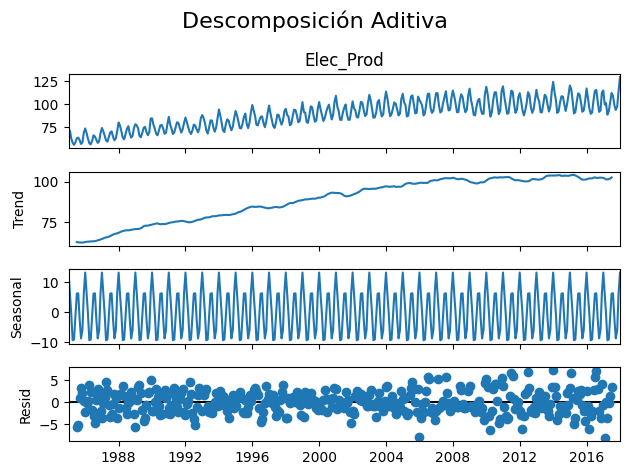

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva
decomposition = seasonal_decompose(data['Elec_Prod'], model='additive', period=12)

# Graficar los resultados
decomposition.plot()
plt.suptitle("Descomposición Aditiva", fontsize=16)
plt.tight_layout()
plt.show()
